In [75]:
import networkx as nx
import matplotlib.pyplot as plt

# ***Centrality***
-------------------------

In [2]:
# Comparison of different centrality measures and how they rank nodes differently

In [13]:
[attr for attr in nx.__dir__() if attr.__contains__("layout")]

['layout',
 'bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'rescale_layout_dict',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'arf_layout']

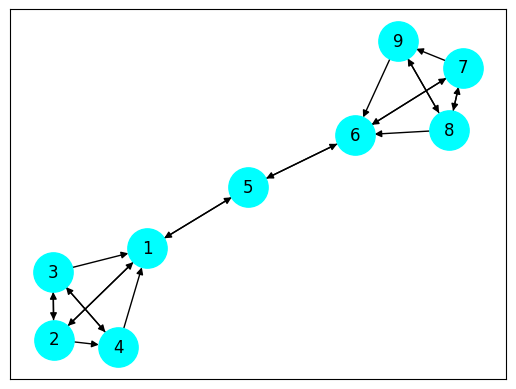

In [63]:
graph = nx.DiGraph()
graph.add_edges_from([(1, 2), (1, 5), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (4, 3), (4, 1), (5, 1), (5, 6),
                     (6, 5), (6, 7), (7, 6), (7, 8), (7, 9), (8, 6), (8, 7), (8, 9), (9, 6), (9, 8)])

position = nx.spring_layout(graph)
nx.draw_networkx(graph, node_color = "cyan", node_size = 800, pos = position)
plt.savefig("./centrality_graph.svg", format = "svg", dpi = 1000)

In [40]:
# In-degrees

in_deg = {node: graph.in_degree(node) for node in graph.nodes()}
in_deg

{1: 4, 2: 2, 5: 2, 3: 2, 4: 2, 6: 4, 7: 2, 8: 2, 9: 2}

In [41]:
# Nodes 1 and 6 have the highest in-degrees (4)
# (incoming edges.)

sorted([(node, in_degree) for (node, in_degree) in in_deg.items()], key = lambda tup: tup[1], reverse = True)

[(1, 4), (6, 4), (2, 2), (5, 2), (3, 2), (4, 2), (7, 2), (8, 2), (9, 2)]

In [42]:
# All the other nodes have 2 in-degrees

In [43]:
# In-degree centrality is only able to say that nodes 1 & 6 are the most important in this network.

In [46]:
# Closeness centrality

sorted([(node, cc) for (node, cc) in nx.closeness_centrality(graph).items()], key = lambda tup: tup[1], reverse = True)

[(5, 0.5714285714285714),
 (1, 0.5333333333333333),
 (6, 0.5333333333333333),
 (2, 0.38095238095238093),
 (7, 0.38095238095238093),
 (3, 0.3076923076923077),
 (4, 0.3076923076923077),
 (8, 0.3076923076923077),
 (9, 0.3076923076923077)]

![img](./centrality_graph.svg)

In [53]:
# Closeness centrality measures importance based on the distance to all the other nodes from the given node
# The shorter the distances more important the node is.

# This makes node 5 as the most important one.
# Because node 5 is in the middle of the network, so closer to most other nodes.
# Nodes 1 & 6 get ranked second
# They are the immediate neighbours of node 5 (makes sense)

In [ ]:
# But these is a structural difference between nodes 3, 4 as well as nodes 8, 9
# If you are to move from node 3 to 2 the path is direct
# but from 4 to 2 is 4 -> 3 -> 2

# similarly
# 8 -> 7 is direct
# 9 - > 7 is 9 -> 8 -> 7

# But closeness centrality has ranked these two pair of nodes similarly
# this difference did not affect the closeness centrality

In [57]:
# Betweenness centrality
# This considers the more times a node shows up in the shortest paths in between all pairs of nodes in the network, 
# the more important that node is

sorted([(node, bc) for (node, bc) in nx.betweenness_centrality(graph).items()], key = lambda tup: tup[1], reverse = True)

[(5, 0.5714285714285714),
 (1, 0.5446428571428571),
 (6, 0.5446428571428571),
 (2, 0.21428571428571427),
 (7, 0.21428571428571427),
 (3, 0.008928571428571428),
 (8, 0.008928571428571428),
 (4, 0.0),
 (9, 0.0)]

![img](./centrality_graph.svg)

In [64]:
# Node with the highest betweenness is node 5
# Next come nodes 1 and 6
# Then nodes 2 and 7
# so far identical to closeness centrality

# But betweenness centrality ranks nodes 3, 4 and nodes 8, 9 differently
# Node 3 can reach node 2 directly
# Node 4 cannot
# so node 3 has higher betweenness centrality than node 4

# Node 8 can reach node 7 directly
# Node 9 cannot
# so node 8 has higher betweenness centrality than node 9

In [67]:
# Page rank

sorted([(node, pr) for (node, pr) in nx.pagerank(graph, max_iter = 1_000_000).items()], key = lambda tup: tup[1], reverse = True)

[(1, 0.1658337062753152),
 (6, 0.1658337062753152),
 (5, 0.1576262358466881),
 (2, 0.10896900830621481),
 (7, 0.10896900830621481),
 (3, 0.07702062010302184),
 (8, 0.07702062010302184),
 (4, 0.06936354739210396),
 (9, 0.06936354739210396)]

In [72]:
# normalized authority scores

sorted([(node, pr) for (node, pr) in nx.hits(graph, max_iter = 1_000_000)[1].items()], key = lambda tup: tup[1], reverse = True)

[(1, 0.2112113527311645),
 (6, 0.2112113527311645),
 (9, 0.1107792644401431),
 (4, 0.11077926444014306),
 (3, 0.10043208829102152),
 (8, 0.10043208829102152),
 (7, 0.06528115989396337),
 (2, 0.06528115989396335),
 (5, 0.024592269287414887)]

In [74]:
# normalized hub scores

sorted([(node, pr) for (node, pr) in nx.hits(graph, max_iter = 1_000_000)[0].items()], key = lambda tup: tup[1], reverse = True)

[(2, 0.14848705094489809),
 (5, 0.14848705094489809),
 (7, 0.14848705094489809),
 (8, 0.13613104444202342),
 (3, 0.1361310444420234),
 (4, 0.10954670500738842),
 (9, 0.1095467050073884),
 (6, 0.031591674133241064),
 (1, 0.03159167413324102)]